In [1]:
# Import libraries.
import tweepy as tp
import re
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
# Key in your personal Twitter credentials.
access_token = "... ..."
access_token_secret = "... ..."
consumer_key = "... ..."
consumer_secret = "... ..."
# Protocol for authorization.
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth, wait_on_rate_limit=True)

In [2]:
# Create a custom search term excluding retweets.
search_term = "#wework -filter:retweets"
#  Define the number of tweets and how far back we wish to look at tweets.
tweets = tp.Cursor(api.search, q=search_term, lang="en", since='2019-10-05').items(5000)
# Define function to clean the tweets such as removing URLs in a text string.
def clean_tweet(text):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split())
tweets_cleaned = [clean_tweet(tweet.text) for tweet in tweets]

In [3]:
# Create textblob objects of the tweets.
textblob_objects = [TextBlob(tweet) for tweet in tweets_cleaned]
textblob_objects[0].polarity, textblob_objects[0]

(0.5,
 TextBlob("This is a really interesting piece on WeWork and the state of their business coworking wework"))

In [4]:
# Create list of polarity values and tweet texts.
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in textblob_objects]
sentiment_values[0:3]

[[0.5,
  'This is a really interesting piece on WeWork and the state of their business coworking wework'],
 [0.0,
  'Ha just saw a job in DC to work at WeWork Think I might skip over that one'],
 [-0.2277777777777778,
  'VC BradFeld on WeWork SoftBank and why venture firms may have to slow down their pacing in 2020']]

In [5]:
# Create dataframe containing the polarity values and tweet texts.
sentiment_df = pd.DataFrame(sentiment_values, columns=["Polarity", "Tweet"])
# Remove polarity values equal to zero. Exclude tweets that are neutral in sentiment.
sentiment_df = sentiment_df[sentiment_df.Polarity != 0]
# View the top 10 rows of the dataframe.
sentiment_df.head(10)

,Polarity,Tweet
0,0.500000,This is a really interesting piece on WeWork a...
2,-0.227778,VC BradFeld on WeWork SoftBank and why venture...
3,0.450000,What are innovation labs and why are they impo...
4,0.500000,SoftBanks Masayoshi Son mulls more cautious in...
5,-0.200000,WeWork member company creates affordable 3D pr...
7,-0.227778,VC Brad Feld on WeWork SoftBank and why ventur...
8,0.850000,Excellent read on WeWork and the importance of...
10,-0.100000,WeWork is trying to reach terms on a financing...
12,0.017500,Meanwhile in Canada WeWork and other coworking...
13,-0.266667,WeWorks Neumann Loses Billionaire Status Its U...


In [6]:
# To view sentiments of all related tweets. 
# Missing values in the extreme left column are of tweets that had a polarity value of zero.
sentiment_df

,Polarity,Tweet
0,0.500000,This is a really interesting piece on WeWork a...
2,-0.227778,VC BradFeld on WeWork SoftBank and why venture...
3,0.450000,What are innovation labs and why are they impo...
4,0.500000,SoftBanks Masayoshi Son mulls more cautious in...
5,-0.200000,WeWork member company creates affordable 3D pr...
7,-0.227778,VC Brad Feld on WeWork SoftBank and why ventur...
8,0.850000,Excellent read on WeWork and the importance of...
10,-0.100000,WeWork is trying to reach terms on a financing...
12,0.017500,Meanwhile in Canada WeWork and other coworking...
13,-0.266667,WeWorks Neumann Loses Billionaire Status Its U...


In [7]:
# To view sentiment of the 3rd row of tweet in the dataframe.
sentiment_df.iloc[[2]]

,Polarity,Tweet
3,0.45,What are innovation labs and why are they impo...


In [8]:
# To obtain statistics of the tweets.
sentiment_df.describe()

,Polarity
count,608.000000
mean,0.126668
std,0.346182
min,-1.000000
25%,-0.100000
50%,0.126786
75%,0.350000
max,1.000000


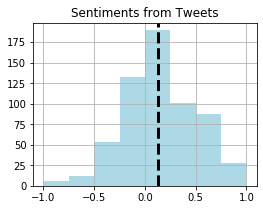

In [9]:
# Define the canvas size of the plot.
fig, ax = plt.subplots(figsize=(4, 3))
# Plot histogram of the polarity values. Histogram bins are 0.25 in size.
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="lightblue")
# Define title of plot.
plt.title("Sentiments from Tweets")
# Overlay the plot with the average line.
plt.axvline(sentiment_df['Polarity'].mean(), color='k', linestyle='dashed', linewidth=3)
plt.show()

In [12]:
# Create another custom search term excluding retweets.
search_term = "#wework+ipo -filter:retweets"
#  Define the number of tweets and how far back we wish to look at tweets.
tweets = tp.Cursor(api.search, q=search_term, lang="en", since='2018-11-12').items(3500)
# Define function to clean the tweets such as removing URLs in a text string.
def clean_tweet(text):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split())
tweets_cleaned = [clean_tweet(tweet.text) for tweet in tweets]
# Create textblob objects of the tweets.
textblob_objects = [TextBlob(tweet) for tweet in tweets_cleaned]
textblob_objects[0].polarity, textblob_objects[0]
# Create list of polarity values and tweet texts.
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in textblob_objects]
sentiment_values[0]
# Create dataframe containing the polarity values and tweet texts.
sentiment_df = pd.DataFrame(sentiment_values, columns=["Polarity", "Tweet"])
# Remove polarity values equal to zero. Exclude tweets that are neutral in sentiment.
sentiment_df = sentiment_df[sentiment_df.Polarity != 0]
# View the top 10 rows of the dataframe.
sentiment_df.head(10)

,Polarity,Tweet
0,0.500000,This is a really interesting piece on WeWork a...
1,0.850000,Excellent read on WeWork and the importance of...
2,-0.266667,WeWorks Neumann Loses Billionaire Status Its U...
4,0.100000,The coworking magnates estimated net worth has...
5,0.116667,WeWorks registration papers hit the SEC websit...
6,0.208333,The attention economy is so quick to fall in l...
7,-0.500000,A couple of my thoughts on WeWork and how its ...
10,0.168182,Answer to Are lossmaking IPOs like Peloton Ube...
15,-0.237500,This could get very ugly very fast former WeWo...
16,0.277778,A quick visit to our favorite IPO of the year ...


In [13]:
# To obtain statistics of the tweets.
sentiment_df.describe()

,Polarity
count,124.000000
mean,0.067447
std,0.347911
min,-1.000000
25%,-0.171875
50%,0.096875
75%,0.300000
max,0.850000


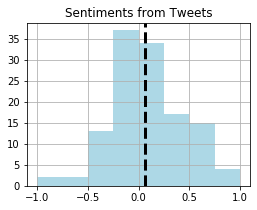

In [14]:
# Define the canvas size of the plot.
fig, ax = plt.subplots(figsize=(4, 3))
# Plot histogram of the polarity values. Histogram bins are 0.25 in size.
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="lightblue")
# Define title of plot.
plt.title("Sentiments from Tweets")
# Overlay the plot with the average line.
plt.axvline(sentiment_df['Polarity'].mean(), color='k', linestyle='dashed', linewidth=3)
plt.show()